In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

In [3]:
X.shape

(50, 2)

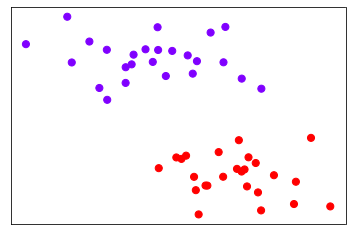

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

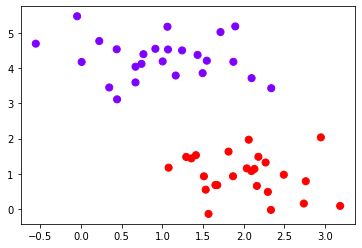

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()  # 获取当前的子图

In [6]:
# 获取平面上两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [7]:
xlim

(-0.7425578984849813, 3.3721920271976598)

In [8]:
ylim

(-0.41872382476349596, 5.754870487889891)

In [9]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

In [10]:
axisy, axisx = np.meshgrid(axisy, axisx)
# 用形成的二维数组作为contour函数中的x和y
# 使用meshgrid函数将两个一维向量转换为特征矩阵
# 核心是将两个特征向量广播，以便获取y.shape*x.shape多个坐标点的横纵坐标

In [11]:
axisx.shape

(30, 30)

In [12]:
axisy.shape

(30, 30)

In [13]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
# 其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
# xy就是已经形成的网格，它是遍布在整个画布上的密集的点

In [14]:
xy.shape

(900, 2)

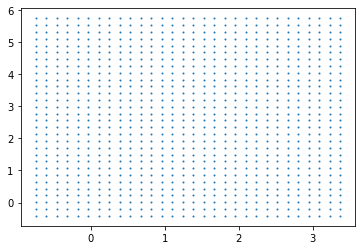

In [15]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

In [16]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel="linear").fit(X, y)
Z = clf.decision_function(xy).reshape(axisx.shape)
# 重要接口decision_function，返回每个输入的样本对应的到决策边界的距离
# 然后将这个距离转换为axisx的结构,这是因为画图函数contour要求Z的结构必须与X和Y保持一致

(-0.41872382476349596, 5.754870487889891)

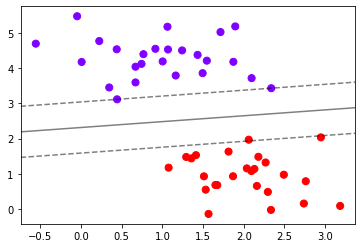

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()  # 获取当前的子图
# 画决策边界和平行于决策边界的超平面
ax.contour(
    axisx,
    axisy,
    Z,
    colors="k",
    levels=[-1, 0, 1],  # 画三条等高线，分别是Z为-1，0，1
    alpha=0.5,
    linestyles=["--", "-", "--"]
)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [18]:
# 将上述过程包装成函数
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(
        X,
        Y,
        P,
        colors="k",
        levels=[-1, 0, 1],  # 画三条等高线，分别是Z为-1，0，1
        alpha=0.5,
        linestyles=["--", "-", "--"]
    )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

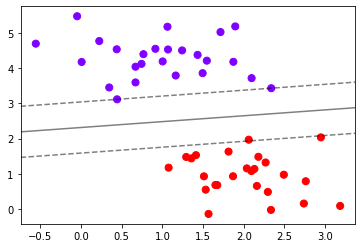

In [19]:
# 则整个绘图过程可以写作：
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)

In [20]:
clf.predict(X)
# 根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [21]:
clf.score(X, y)
# 返回给定测试数据和标签的平均准确度

1.0

In [22]:
clf.support_vectors_
# 返回支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [23]:
clf.n_support_
# 返回每个类中支持向量的个数

array([2, 1])

In [24]:
from sklearn.datasets import make_circles

In [25]:
X, y = make_circles(100, factor=0.1, noise=0.1)

In [26]:
X.shape

(100, 2)

In [27]:
y.shape

(100,)

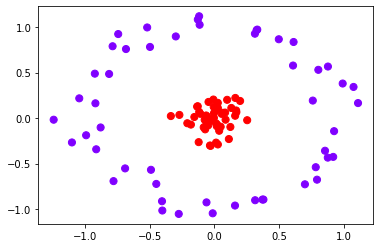

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.show()

In [29]:
# 定义一个由X计算出来的新维度r
r = np.exp(-(X**2).sum(1))

In [30]:
rlim = np.linspace(min(r), max(r), 100)

In [31]:
from mpl_toolkits import mplot3d

In [32]:
# 定义一个绘制三维图像的函数
# elev表示上下旋转的角度
# azim表示平行旋转的角度
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap="rainbow")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

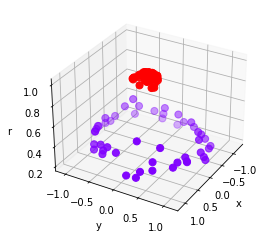

In [33]:
plot_3D()

In [34]:
# 3D可交互控件
from ipywidgets import interact, fixed

interact(plot_3D, elev=[0, 30, 60, 90, 120], azip=(-180, 180), X=fixed(X), y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120), value=30), IntSlider…

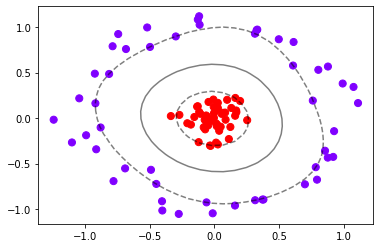

In [35]:
# 使用“rbf”高斯径向基核函数找出非线性可分决策边界
clf = SVC(kernel="rbf").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)